In [1]:
import pandas as pd
import h5py as h5
import numpy as np
from maayanlab_bioinformatics.dge import limma_voom
import os

In [2]:
species = "mouse"
h5_version = "10"
gsm4sig_version = 1

# Create a folder for results 
os.makedirs(f'results/{species}/')

In [3]:
# Load ARCHS4 data
f = h5.File(f"{species}_matrix_v{h5_version}.h5", "r")
expression = f['data/expression']
genes = [x.decode('UTF-8') for x in f['meta/genes/gene_symbol']]
samples = [x.decode('UTF-8') for x in f['meta/samples/geo_accession']] #GSMs

In [ ]:
# Define control and pertubration samples
study = 'GSE100363'
ctrl = ['GSM2679560','GSM2679562','GSM2679564','GSM2679566']
pert = ['GSM2679559','GSM2679561','GSM2679563','GSM2679565']

In [4]:
# Perform DEG analysis with Limma
# study_idx: index of study
# study_name: GSE
# control_samples: list of control GSMs
# pert_samples: list of perturbation GSMs

def degAnalysisLimma (study_idx, study_name, control_samples, pert_samples):
    
    # Find where control and perturbation samples are in ARCHS4
    control_idx = sorted([i for i,x in enumerate(samples) if x in control_samples])
    pert_idx =  sorted([i for i,x in enumerate(samples) if x in pert_samples])
    
    # Subset control samples to dataframe
    control_df = pd.DataFrame(expression[:,control_idx])
    control_df.index = genes
    control_df.columns = ['control' + str(n) for n in range(0,len(control_df.columns))]
    
    # Subset perturbation samples to dataframe
    pert_df = pd.DataFrame(expression[:,pert_idx])
    pert_df.index = genes
    pert_df.columns = ['pert' + str(n) for n in range(0,len(pert_df.columns))]

    # Limma voom expects the raw gene counts
    # Perform DEG analysis
    deg_results = limma_voom.limma_voom_differential_expression(controls_mat= control_df, cases_mat= pert_df, voom_design=True,filter_genes=True)
    
    # Save results to csv file in results folder 
    deg_results.to_csv(f'results/{species}/{study_idx}_{study_name}_limma_results.csv')


In [5]:
gsm4sig = pd.read_csv(f"{species}_gsm4sig_v{gsm4sig_version}.csv", converters = {"ctrl_gsm":eval, "pert_gsm":eval}, index_col=0)

In [6]:
len(gsm4sig)

4216

In [11]:
for idx in gsm4sig.index[2407:]:
    if idx % 100 == 0: print(idx, "signatures calculated")
    degAnalysisLimma(idx, gsm4sig.at[idx, "series_id"], gsm4sig.at[idx, "ctrl_gsm"], gsm4sig.at[idx, "pert_gsm"])

R[write to console]: Loading required package: R.oo

R[write to console]: Loading required package: R.methodsS3

R[write to console]: R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R[write to console]: R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.

R[write to console]: 
Attaching package: 'R.oo'


R[write to console]: The following object is masked from 'package:R.methodsS3':

    throw


R[write to console]: The following objects are masked from 'package:methods':

    getClasses, getMethods


R[write to console]: The following objects are masked from 'package:base':

    attach, detach, load, save


R[write to console]: R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.

R[write to console]: 
Attaching package: 'R.utils'


R[write to console]: The following object is masked from 'package:utils':

    timestamp


R[write to console]: The following objects are masked from

2500 signatures calculated
2600 signatures calculated
2700 signatures calculated
2800 signatures calculated
2900 signatures calculated
3000 signatures calculated
3100 signatures calculated
3200 signatures calculated
3300 signatures calculated
3400 signatures calculated
3500 signatures calculated
3600 signatures calculated
3700 signatures calculated
3800 signatures calculated
3900 signatures calculated
4000 signatures calculated
4100 signatures calculated
4200 signatures calculated


In [ ]:
# Call function to get results
degAnalysisLimma(4, study, ctrl, pert)

In [12]:
f.close()

Signature statistics for mouse:

Total Signatures: 4216
High quality signatures (score=0,1): 76.02%
Breakdown by extrap_score:
1    2290
3     959
0     915
2      52
Name: extrap_score, dtype: int64


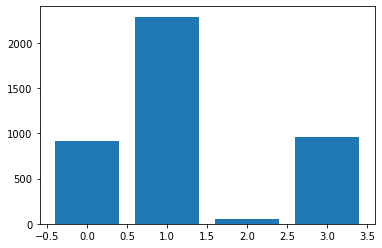

In [32]:
print(f"Signature statistics for {species}:\n")
print(f"Total Signatures: {len(gsm4sig['extrap_score'])}")
print(f"High quality signatures (score=0,1): \
{sum(gsm4sig['extrap_score'].value_counts()[[0,1]])/sum(gsm4sig['extrap_score'].value_counts())*100:.2f}%")
print(f"Breakdown by extrap_score:\n{gsm4sig['extrap_score'].value_counts()}")
plt.bar(gsm4sig["extrap_score"].value_counts().index, gsm4sig["extrap_score"].value_counts())
plt.show()

In [14]:
sum(gsm4sig["extrap_score"].value_counts()[[0,1]])/sum(gsm4sig["extrap_score"].value_counts())

0.7601992409867173

<BarContainer object of 4 artists>

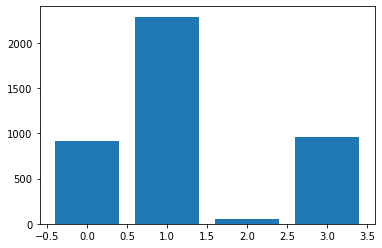

In [15]:
from matplotlib import pyplot as plt
plt.bar(gsm4sig["extrap_score"].value_counts().index, gsm4sig["extrap_score"].value_counts())